# Monte-Carlo-Simulation

© Thomas Robert Holy 2019
<br>
Version 0.1.7

## Grundlegende Einstellungen:

Zunächst müssen die notwendigen Pakete (auch Module) importiert werden, damit auf diese zugegriffen werden kann. 

In [1]:
import scipy.stats as st # SciPy ist ein Python-basiertes Ökosystem für Open-Source-Software für Mathematik, Naturwissenschaften und Ingenieurwissenschaften
from scipy.stats import rankdata, norm  
from scipy import array, linalg, dot
import random # Dieses modul wird verwendet um Zufallszahlen zu ziehen
import numpy as np # Programmbibliothek die eine einfache Handhabung von Vektoren, Matrizen oder generell großen mehrdimensionalen Arrays ermöglicht
import math # Dieses Modul wird verwendet um Skalardaten zu berechnen, z. B. trigonometrische Berechnungen.
import operator # Programmbibliothek, welche die Ausgaben übersichtlicher gestaltet
import matplotlib.pyplot as plt # Programmbibliothek die es erlaubt mathematische Darstellungen aller Art anzufertigen
import matplotlib.patches as mpatches

Anschließend werden Einstellungen definiert, die die Formatierung der Ausgaben betreffen.
Hierfür wird das Modul `operator` genutzt.
Außerdem wird die Größe der Grafiken modifiziert, welche später angezeigt werden sollen.

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

SCREEN_WIDTH = 114
centered = operator.methodcaller('center', SCREEN_WIDTH)

plt.rcParams["figure.figsize"] = 15,15

## Monte-Carlo Simulation:

### Variablen spezifizieren

Im ersten Schritt werden die für die Simulation notwenigen Variablen definiert.

In [4]:
##########################################################################
#-------------------------------------------------------------------------
# Anzahl Simulationsdurchläufe
n = 10000

#----------------------------------------------------
# Neue Randverteilungen (Gleichverteilung)
rand_x = [10,20]
rand_y = [8,22]

#----------------------------------------------------
# Varianzen und Korrelation(en)
var_x = 4 
var_y = 9

corr_list = [0]
std_list = [math.sqrt(var_x),math.sqrt(var_y)]

#----------------------------------------------------
# Erwartungswerte
mu = [2, 3]
#-------------------------------------------------------------------------
##########################################################################

### Funktionen definieren

Als nächstes werden Funktionen definiert, welche aus den gegeben Varianzen und ggf. Korrelationen eine Varianz-Kovarianz-Matrix berechnen, ein Array mit den Varianzen anlegen und die Cholesky-Zerlegung auf der Grundlage Varianz-Kovarianz-Matrix berechnen der durchführen.

In [5]:
#---------------------------------------------------------------------------------------------------------------
# Varianz-Kovarianz-Matrix erstellen

def var_covar_matrix_func(std_list,corr_list):
    global var_covar
    global var_list
    
    i = 0
    j = 0
    counter_0 = 0
    counter_1 = 0    
    len_std_list = len(std_list)
    array = [[0] * len_std_list] * len_std_list    
    val_list = []
    
    for i in range(0,len_std_list):
        for j in range(0,len_std_list):
            if i == j:
                val = std_list[i] * std_list[i]
                val_list.append(val)
            if i < j:
                val = (std_list[i] * std_list[j] * corr_list[counter_0])
                counter_0 += 1
                val_list.append(val)
            if i > j:
                val = (std_list[i] * std_list[j] * corr_list[counter_1])
                counter_1 += 1
                val_list.append(val)
    var_covar = np.array(val_list).reshape(len_std_list,len_std_list)   
    
#---------------------------------------------------------------------------------------------------------------
# Varianz-Array erstellen

def var_func():
    global var_list
    var_list = []    
    for i in range(0,len(std_list)):
        var = np.power(std_list[i],2)
        var_list.append(var)

#---------------------------------------------------------------------------------------------------------------
# Cholesky-Zerlegung durchführen

def cholesky_func():
    global cholesky
    cholesky = linalg.cholesky(var_covar, lower=True)

#---------------------------------------------------------------------------------------------------------------   
# Funktionen aufrufen

var_func()
var_covar_matrix_func(std_list,corr_list)
cholesky_func()

### Funktion für die Monte-Carlo-Simulation definieren

Nun wird eine Funktion definiert, in welcher die Simulation durchgeführt wird. 
Dabei werden zunächst zwei gleichverteilte Pseudo-Zufallsvariablen generiert, welche anschließend in unabhängige standardnormalverteilte Zufallsvariablen transformiert werden.
Letztere werden unter Anwendung der Cholesky-Zerlegung in abhängige standardnormalverteilte Zufallsvariablen überführt.
Danach werden diese unter Anwendung der oben definierten Standardabweichung und des Erwartungswertes in Realisationen der Gauss-Copula überführt, bevor auf diese anschließend die neuen Randverteilungen angewendet werden.
Zum Schluss wird die Summe aus beiden Realisationen gebildet, welche den Portfolio-Wert ergibt.

In [6]:
total_standard_norm_ab_list = []
total_realisation_cop_list = []
total_xy_list = []
total_summe_liste = []

def copula_sim(n, rand_x, rand_y, mu):
    global total_standard_norm_ab_list
    global total_realisation_cop_list
    global total_xy_list
    global total_summe_liste
    
    for i in range(0,n):        
        #---------------------------------------------------------------------------------------------------------------
        # Gleichverteilte Zufallsvariablen ziehen
        
        n = 2
        random_ZV_list = []        
        for i in range(0,n):
            x = random.random()
            random_ZV_list.append(x)
        
        #---------------------------------------------------------------------------------------------------------------
        # Transformation der gleichverteilten Zufallsvariablen in unabhängige standardnormalverteilte Zufallsvariablen

        standard_norm_list = norm.ppf(random_ZV_list)        
        
        #---------------------------------------------------------------------------------------------------------------
        # Transformation in standardnormalvertzeilte abhängie ZV
        
        standard_norm_ab_list = []
        counter_cholesky_0 = 0
        counter_cholesky_1 = 0
        counter_mu = 0
        counter_standard_norm_list = 0

        for i in range(0,2):
            a = cholesky[counter_cholesky_0][counter_cholesky_1] * standard_norm_list[counter_standard_norm_list]
            counter_cholesky_1 += 1
            counter_standard_norm_list += 1

            b = cholesky[counter_cholesky_0][counter_cholesky_1] * standard_norm_list[counter_standard_norm_list]
            counter_cholesky_0 += 1  
            counter_cholesky_1 = 0
            counter_standard_norm_list = 0  

            r = a  + b + mu[counter_mu]
            standard_norm_ab_list.append(r)
            counter_mu += 1

        #---------------------------------------------------------------------------------------------------------------
        # Transformation Realisationen der Gauss-Copula

        counter = 0
        realisation_cop_list = []        
        for i in range(0,2):
            r_cop = (standard_norm_ab_list[counter] - mu[counter]) / math.sqrt(var_list[counter])   
            p_value = st.norm.cdf(r_cop)
            realisation_cop_list.append(p_value)
            counter += 1
            
        #---------------------------------------------------------------------------------------------------------------
        # Gemeinsame Verteilung: Übertragung der neuen Ränder auf die ermittelte Abhängigkeitsstruktur          

        x = (rand_x[0]-rand_x[1]) * realisation_cop_list[0] + rand_x[1]
        y = (rand_y[0]-rand_y[1]) * realisation_cop_list[1] + rand_y[1]
        summe = x + y        
        xy = (x,y)
        
        total_standard_norm_ab_list.append(standard_norm_ab_list)
        total_realisation_cop_list.append(realisation_cop_list)
        total_xy_list.append(xy)
        total_summe_liste.append(summe)
        
copula_sim(n, rand_x, rand_y, mu)

# Graphische Ausgaben:

## Realisationen abhängiger bivariat normalverteilter Zufallsvariablen

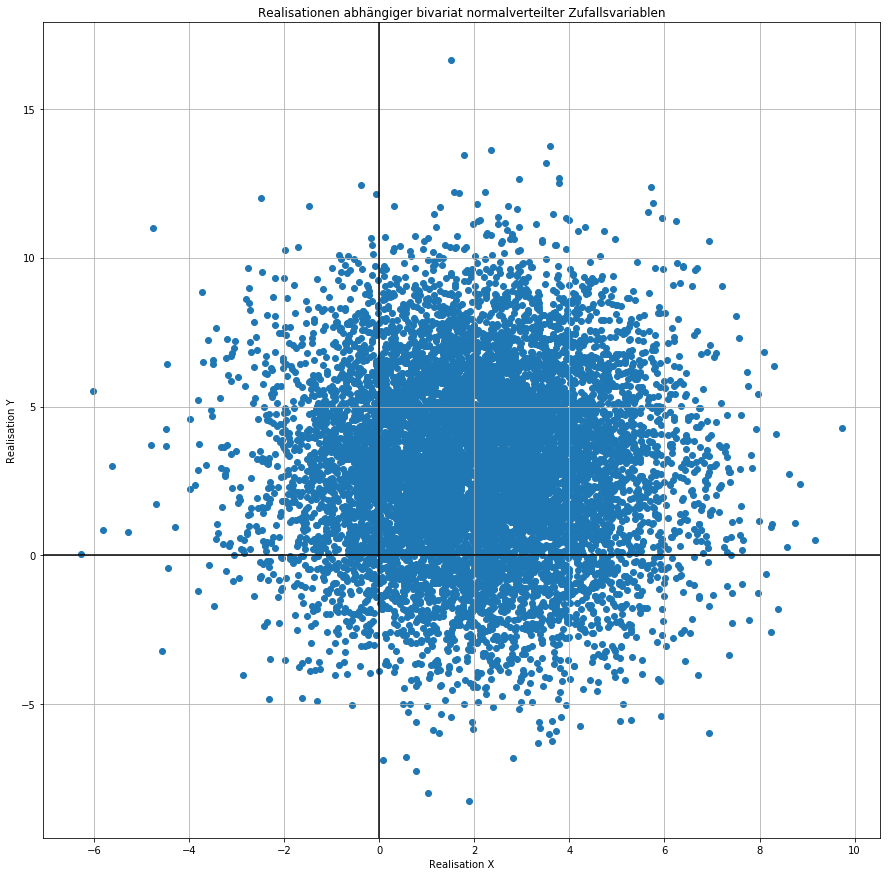

In [7]:
counter_1 = 0
counter_2 = 0
x_liste = []
y_liste = []

for i in range(0,len(total_standard_norm_ab_list)):
    x = total_standard_norm_ab_list[counter_1][0]
    y = total_standard_norm_ab_list[counter_1][1]
    x_liste.append(x)
    y_liste.append(y)
    counter_1 += 1
    counter_2 += 1

plt.scatter(x_liste, y_liste)
plt.grid()
plt.xlabel('Realisation X')
plt.ylabel('Realisation Y')
plt.title('Realisationen abhängiger bivariat normalverteilter Zufallsvariablen')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

## Realisationen Gauss-Copula

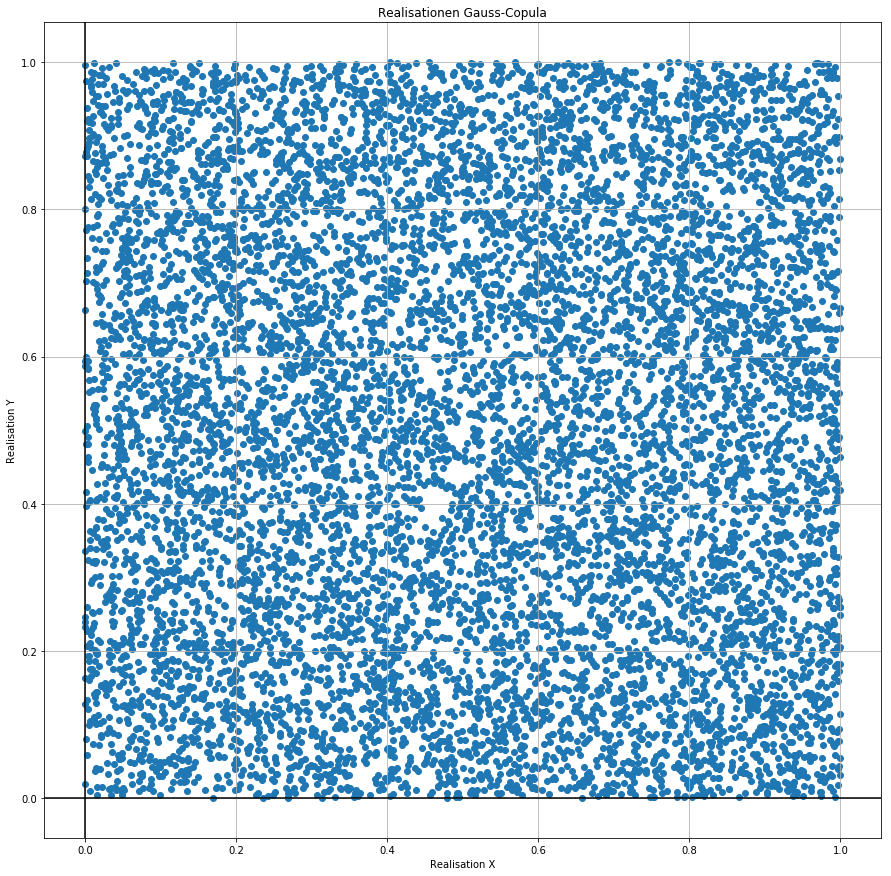

In [8]:
counter_1 = 0
counter_2 = 0
x_liste = []
y_liste = []

for i in range(0,len(total_realisation_cop_list)):
    x = total_realisation_cop_list[counter_1][0]
    y = total_realisation_cop_list[counter_1][1]
    x_liste.append(x)
    y_liste.append(y)
    counter_1 += 1
    counter_2 += 1

plt.scatter(x_liste, y_liste)
plt.grid()
plt.xlabel('Realisation X')
plt.ylabel('Realisation Y')
plt.title('Realisationen Gauss-Copula')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()


## Realisationen gleichverteilte X, Y mit Gauss-Copula

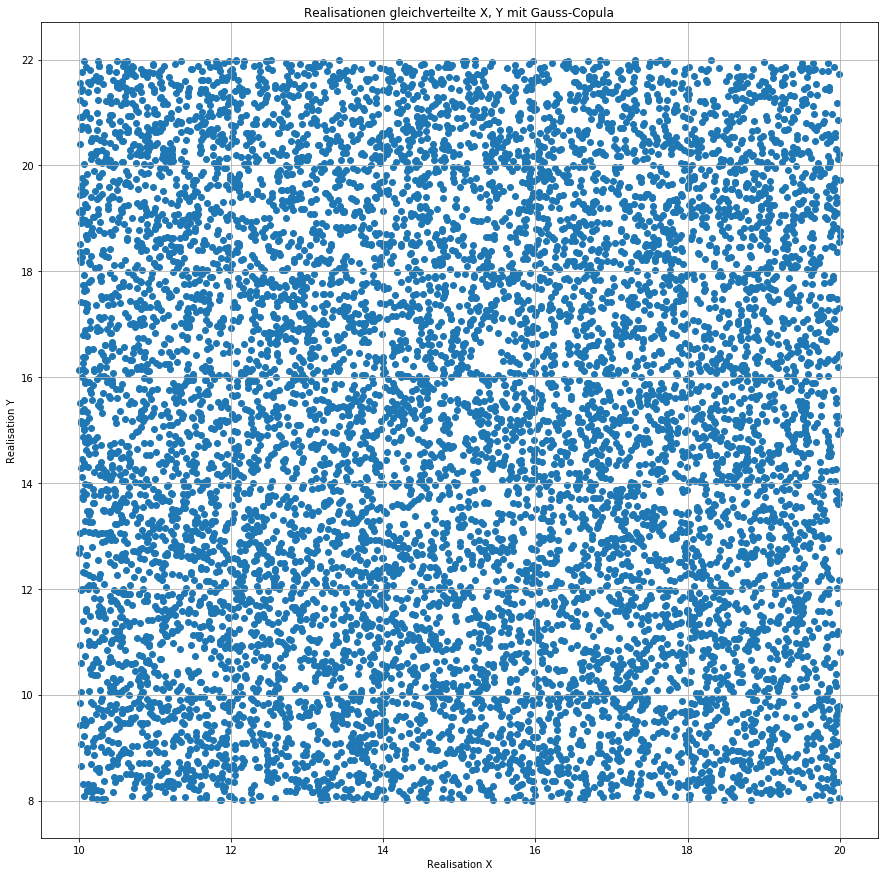

In [9]:
counter_1 = 0
counter_2 = 0
x_liste = []
y_liste = []

for i in range(0,len(total_xy_list)):
    x = total_xy_list[counter_1][0]
    y = total_xy_list[counter_1][1]
    x_liste.append(x)
    y_liste.append(y)
    counter_1 += 1
    counter_2 += 1

plt.scatter(x_liste, y_liste)
plt.grid()
plt.xlabel('Realisation X')
left, right = plt.xlim()
plt.xlim((left, right))   
plt.xlim(left, right)     
left, right = plt.ylim()
plt.ylim((left, right)) 
plt.ylim(left, right)     
plt.ylabel('Realisation Y')
plt.title('Realisationen gleichverteilte X, Y mit Gauss-Copula')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

## Histogramm X+Y, Realisationen gleichverteilte X, Y mit Gauss-Copula

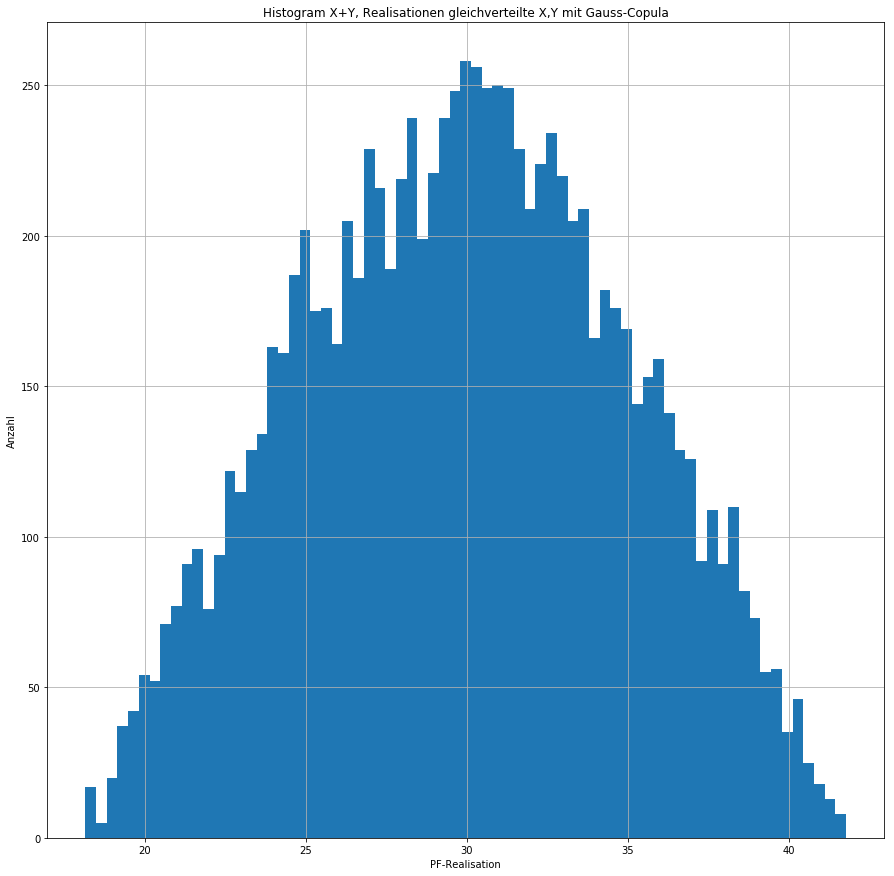

In [10]:
bins = 71
data = total_summe_liste
plt.hist(data, bins=bins)
plt.grid()
plt.title('Histogram X+Y, Realisationen gleichverteilte X,Y mit Gauss-Copula')
plt.xlabel('PF-Realisation')
plt.ylabel('Anzahl')
plt.show()

## Verteilung X+Y, Realisationen gleichverteilte X, Y mit Gauss-Copula

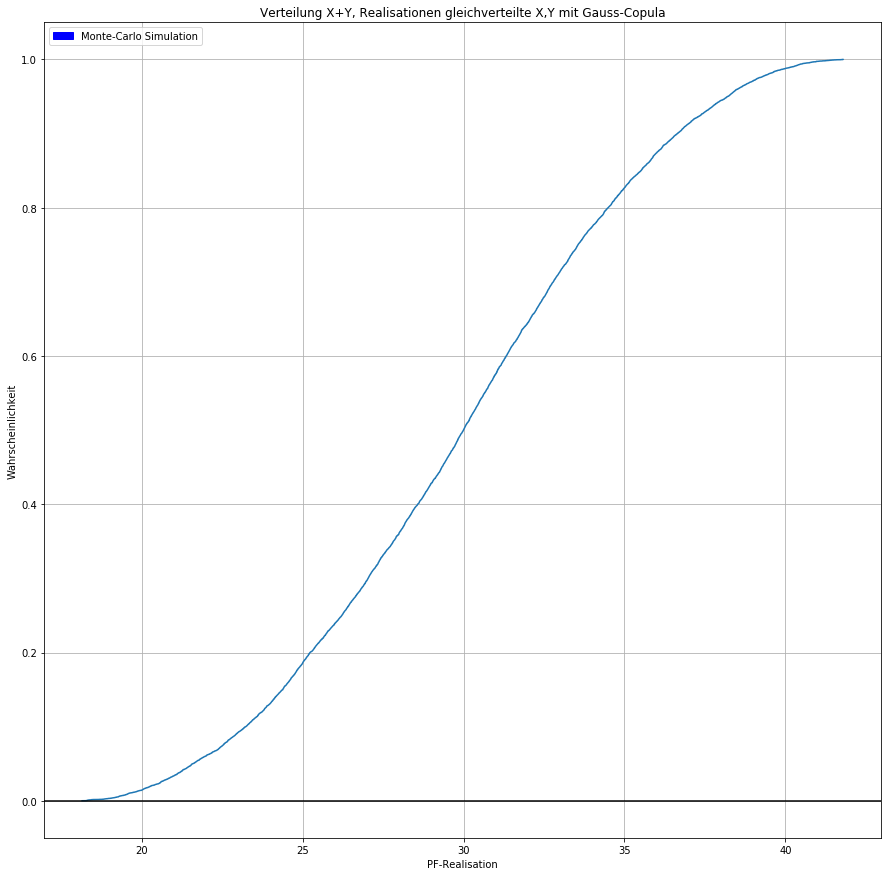

In [11]:
H, X1 = np.histogram(total_summe_liste, bins=n, density=True)
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1)

plt.grid()
plt.xlabel('PF-Realisation')
plt.ylabel('Wahrscheinlichkeit')
left, right = plt.xlim()
plt.xlim((left, right))
plt.xlim(left, right)
blue_patch = mpatches.Patch(color='blue', label='Monte-Carlo Simulation')
plt.legend(handles=[blue_patch], loc='upper left')
plt.title('Verteilung X+Y, Realisationen gleichverteilte X,Y mit Gauss-Copula')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

## Risikomaße schätzen:

### Value at Risk

Um den Value at Risk für die historische Simulation zu bestimmen, werden die Portfolio-Realisationen zunächst der Größe nach sortiert, wobei dieser Schritt gleichzeitig der  Ausgangspunkt für die Berechnung des Conditional Value at Risk und des Power-Sepktralen Risikomaßes ist.
Anschließend wird das Alpha-Quantil der Verlustfunktion bestimmt, indem der Parameter "alpha" mit der Länge der Liste "RM_list" multipliziert wird. Der so ermittelte Wert gibt die Position in der Liste "RM_list" an, an welcher sich der Value at Risk zum Konfidenzniveau "alpha" befindet.

In [12]:
RM_list = sorted(total_summe_liste)

def VaR(alpha):
    item = int((alpha * len(RM_list))) - 1
    VaR = RM_list[item]
    print('#------------------------------------------------------------------------------------------------------------------#')
    print('|' + centered('Der VaR beträgt: ' + str(VaR) + '.') + '| ')

### Conditional Value at Risk

Der Conditional Value at Risk wird grundsätzlich wie der Value at Risk bestimmt, wobei hier jedoch der Mittelwert über alle Realisationen bis zum Alpha-Quantil gebildet wird. 
Daher wird hier nach der Positionsbestimmung die Liste "CVaR_list" mit denjenigen Realisationen aus der Liste "RM_list" gefüllt, welche den Bereich von der kleinsten Realisation bis zum Alpha-Quantil abdecken. 
Die Summe dieser Liste wird anschließend durch die Anzahl ihrer Elemente geteilt.

In [13]:
def CVaR(alpha):
    item = int((alpha * len(RM_list)))
    CVaR_list = RM_list[0:item]     
    CVaR = np.sum(CVaR_list) / len(CVaR_list)
    print('#------------------------------------------------------------------------------------------------------------------#')
    print('|' + centered('Der CVaR beträgt: ' + str(CVaR) + '.') + '| ')

### Power-Spektrales Risikomaß

Für das Power-Spektrale Risikomaß ergibt sich der Erwartungswert aus dem Mittelwert der "RM_list" (der Mittelwert der Portfolio-Realisationen) und das Risiko ergibt sich aus dem Matrixprodukt der transponierten "RM_list" mit der "subj_ws_list", welche subjektive Wahrscheinlichkeiten beinhaltet.
Die Elemente letzterer Liste werden berechnet, indem die Laufvariable jeder Realisation in der geordneten Statisitk "RM_list" (hier: 1 bis 10.000) durch die Gesamtanzahl der Realisationen (hier: 10.000) geteilt und dann mit "gamma" potenziert wird (daher heißt es Power-Sepktrales Risikomaß).
Dabei ist bei jeder Berechnung der jeweils vorher errechnete Wert zu subtrahieren.

In [14]:
def power(gamma):
    EW = np.mean(RM_list)
    print('#------------------------------------------------------------------------------------------------------------------#')
    print('|' + centered('Power-Spektrales Risikomaß bei der historischen Simulation:') + '| ')
    print('#------------------------------------------------------------------------------------------------------------------#')
    print('|' + centered('Der Erwartungswert beträgt: ' + str(EW) + '.') + '| ')

    subj_ws_list = []
    counter1 = len(RM_list)
    counter2 = len(RM_list)-1
    for i in RM_list:
        subj_ws = (np.power((counter1 / len(RM_list)), gamma)) - (np.power((counter2 / len(RM_list)), gamma)) 
        counter1 -= 1
        counter2 -= 1
        subj_ws_list.append(subj_ws)
    subj_ws_list = subj_ws_list[::-1]
    risk = np.matmul(np.transpose(RM_list), subj_ws_list)
    print('|' + centered('Das Risiko beträgt: ' + str(risk) + '.') + '| ')
    print('#------------------------------------------------------------------------------------------------------------------#')

### Parameterfestlegung und Aufruf der Funktionen

In [15]:
##########################################################################
#-------------------------------------------------------------------------
alpha = 0.05
VaR(alpha)

alpha = 0.05
CVaR(alpha)

gamma = 0.5
power(gamma)
#-------------------------------------------------------------------------
##########################################################################

#------------------------------------------------------------------------------------------------------------------#
|                                       Der VaR beträgt: 21.592673535320447.                                       | 
#------------------------------------------------------------------------------------------------------------------#
|                                       Der CVaR beträgt: 20.42903288305132.                                       | 
#------------------------------------------------------------------------------------------------------------------#
|                           Power-Spektrales Risikomaß bei der historischen Simulation:                            | 
#------------------------------------------------------------------------------------------------------------------#
|                                  Der Erwartungswert beträgt: 29.92555486376805.                                  | 
|                                      Das Risiko beträgt: 2

## Inkonsistenz Monte-Carlo-Simulation

Ein Kritikpunkt an der Monte-Carlo-Simulation ist, dass das Ergebnis des Verfahrens großen Schwankungen unterliegen kann, sofern nur wenige Realisationen in einem Simulationslauf simuliert werden.
Dies soll die folgende Grafik veranschaulichen.
Dabei kann sowohl die Anzahl der Simulationsläufe als auch die Anzahl der in jeder Simulation durchgeführten Simulationen varriert werden.

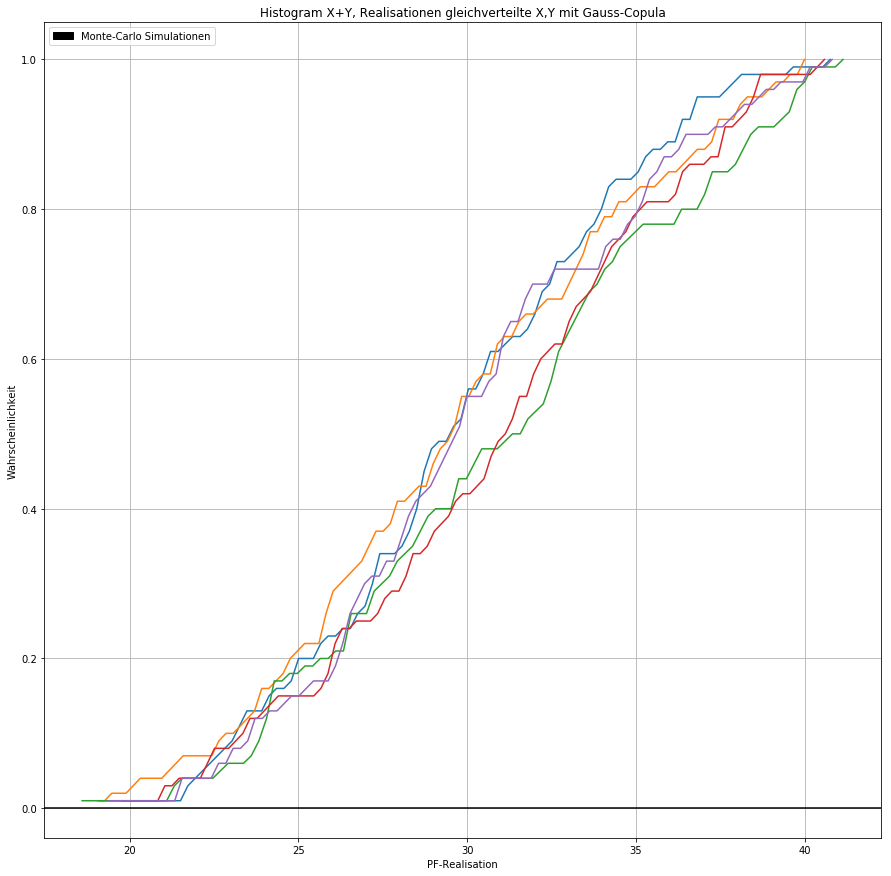

In [16]:
total_summe_liste = []

#-------------------------------------------
# Variablen für den Simulationslauf

rand_x = [10,20]
rand_y = [8,22]
var_x = 4 
var_y = 9
corr_list = [0]
std_list = [math.sqrt(var_x),math.sqrt(var_y)]
mu = [2, 3]

#-------------------------------------------
# Funktionsaufruf

var_func()
var_covar_matrix_func(std_list,corr_list)
cholesky_func()

##########################################################################
#-------------------------------------------------------------------------
# Wiederholungen der Simulationen

runs_sim = 100 # Legt die Anzahl der Durchläufe einer Simulation fest
runs_func = 5 # Legt fest, wie viele Simulationen durchgeführt werden

for i in range(0,runs_func):
    copula_sim(runs_sim, rand_x, rand_y, mu)

#-------------------------------------------------------------------------
##########################################################################
#-------------------------------------------

counter_0 = 0
counter_1 = runs_sim
array = []
for i in range(0,runs_func):
    x = total_summe_liste[counter_0:counter_1]
    array.append(x)
    counter_0 += runs_sim
    counter_1 += runs_sim

#-------------------------------------------

for items in array:
    values_PF = items
    bins = runs_sim

    H, X1 = np.histogram(values_PF, bins, density=True)
    dx = X1[1] - X1[0]
    F1 = np.cumsum(H)*dx
    plt.plot(X1[1:], F1)

plt.grid()
plt.xlabel('PF-Realisation')
plt.ylabel('Wahrscheinlichkeit')
left, right = plt.xlim()
plt.xlim((left, right))
plt.xlim(left, right)
black_patch = mpatches.Patch(color='black', label='Monte-Carlo Simulationen')
plt.legend(handles=[black_patch], loc='upper left')
plt.title('Histogram X+Y, Realisationen gleichverteilte X,Y mit Gauss-Copula')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()